<h1>Don't forget to upvote
</h1>


In [ ]:

  
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected=True)
%matplotlib inline

In [ ]:
df=pd.read_csv("../input/world-happiness-report-2019/world-happiness-report-2019.csv")

In [ ]:
df.head()

<h1>Correlation Matrix</h1>

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="Blues",annot=True)

<h1>Generalizing the dataset more by introducing a new column of Continent.</h1>

In [ ]:
asia = ["Israel", "United Arab Emirates", "Singapore", "Thailand", "Taiwan Province of China",
                 "Qatar", "Saudi Arabia", "Kuwait", "Bahrain", "Malaysia", "Uzbekistan", "Japan",
                 "South Korea", "Turkmenistan", "Kazakhstan", "Turkey", "Hong Kong S.A.R., China", "Philippines",
                 "Jordan", "China", "Pakistan", "Indonesia", "Azerbaijan", "Lebanon", "Vietnam",
                 "Tajikistan", "Bhutan", "Kyrgyzstan", "Nepal", "Mongolia", "Palestinian Territories",
                 "Iran", "Bangladesh", "Myanmar", "Iraq", "Sri Lanka", "Armenia", "India", "Georgia",
                 "Cambodia", "Afghanistan", "Yemen", "Syria"]
europe = ["Norway", "Denmark", "Iceland", "Switzerland", "Finland",
                 "Netherlands", "Sweden", "Austria", "Ireland", "Germany",
                 "Belgium", "Luxembourg", "United Kingdom", "Czech Republic",
                 "Malta", "France", "Spain", "Slovakia", "Poland", "Italy",
                 "Russia", "Lithuania", "Latvia", "Moldova", "Romania",
                 "Slovenia", "North Cyprus", "Cyprus", "Estonia", "Belarus",
                 "Serbia", "Hungary", "Croatia", "Kosovo", "Montenegro",
                 "Greece", "Portugal", "Bosnia and Herzegovina", "Macedonia",
                 "Bulgaria", "Albania", "Ukraine"]
north_america = ["Canada", "Costa Rica", "United States", "Mexico",  
                 "Panama","Trinidad and Tobago", "El Salvador", "Belize", "Guatemala",
                 "Jamaica", "Nicaragua", "Dominican Republic", "Honduras",
                 "Haiti"]
south_america = ["Chile", "Brazil", "Argentina", "Uruguay",
                 "Colombia", "Ecuador", "Bolivia", "Peru",
                 "Paraguay", "Venezuela"]
australia = ["New Zealand", "Australia"]
d_asia = dict.fromkeys(asia, 'Asia')
print(d_asia)
d_europe = dict.fromkeys(europe, 'Europe')
print(d_europe)
d_north_america = dict.fromkeys(north_america, 'North America')
print(d_north_america)
d_south_america = dict.fromkeys(south_america, 'South America')
print(d_south_america)
d_australia = dict.fromkeys(australia, 'Australia')
print(d_australia)
continent_dict = {**d_asia, **d_europe, **d_north_america, **d_south_america, **d_australia}
print(continent_dict)
df["continent"] = df["Country (region)"].map(continent_dict)
df.continent.fillna("Africa", inplace=True)

In [ ]:
df.head()

In [ ]:
asias = df[df['continent'] == "Asia"]
europe  = df[df['continent'] == "Europe"]
north_am = df[df['continent'] == "North America"]
south_am = df[df['continent'] == "South America"]

<h1>Comparing Asia with other Continents and finding insights</h1>

In [ ]:
data = [
    (asias.mean().values),
    (europe.mean().values),
    (south_am.mean().values),
    (north_am.mean().values)
]

dataframe = pd.DataFrame(data=data,columns=asias.mean().index)
df_first = dataframe[['Ladder','Positive affect','Negative affect','Social support']]

In [ ]:
n_groups = 4
asia = df_first.loc[0].values
europe = df_first.loc[1].values
south_am = df_first.loc[2].values
north_am = df_first.loc[3].values
# create plot
fig, ax = plt.subplots()
index = np.linspace(0,10,n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, asia, bar_width,
alpha=opacity,
color='b',
label='Asia')

rects2 = plt.bar(index + bar_width, europe, bar_width,
alpha=opacity,
color='g',
label='Europe')

rects3 = plt.bar(index + 2*bar_width, south_am, bar_width,
alpha=opacity,
color='r',
label='South Am')

rects3 = plt.bar(index + 3*bar_width, north_am, bar_width,
alpha=opacity,
color='y',
label='North Am')


plt.xlabel('Continent')
plt.ylabel('Scores')
plt.title('Score')
plt.xticks(index + bar_width, ('Ladder', 'Positive affect', 'Negative affect', 'Social Support'))
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df_second = dataframe[['Freedom','Corruption','Generosity','Log of GDP\nper capita']]

In [ ]:
n_groups = 4
asia = df_second.loc[0].values
europe = df_second.loc[1].values
south_am = df_second.loc[2].values
north_am = df_second.loc[3].values
# create plot
fig, ax = plt.subplots()
index = np.linspace(0,10,n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, asia, bar_width,
alpha=opacity,
color='b',
label='Asia')

rects2 = plt.bar(index + bar_width, europe, bar_width,
alpha=opacity,
color='g',
label='Europe')

rects3 = plt.bar(index + 2*bar_width, south_am, bar_width,
alpha=opacity,
color='r',
label='South Am')

rects3 = plt.bar(index + 3*bar_width, north_am, bar_width,
alpha=opacity,
color='y',
label='North Am')


plt.xlabel('Continent')
plt.ylabel('Scores')
plt.title('Score')
plt.xticks(index + bar_width, ('Freedom', 'Corruption', 'Generosity', 'GDP'))
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
asias.fillna(method = "ffill",inplace = True)

In [ ]:
sns.distplot(asias['Log of GDP\nper capita'], color='royalblue')

<h3>Conclusions & Insights</h3>
<ul>
    <li>
        Asia
        <ul>
            <li>Cantril Ladder scoren high among other continents. That purely means that people in Asia are highly satisfied with their life than others</li>
            <li>Looking at positive affect score, people are good enough positive. They feel joy, gratitude, serenity, interest, hope, pride, amusement, inspiration, awe and love. But for Asia even average negative score is high. So the people are with mixed emotions.</li>
            <li>Social Suppot is highly reactive to Happiness Score. This states that when people are connected with each other, if they have more friends then they will remain happy. Thats what people in Asia are.</li>
            <li>And by correlation heat map GDP is in correlation with Social support. And this makes sense as people will help each other then they are more likely to grow together in much better way. So GDP also supports Happiness Score.</li>
            <li>All continents have almost equal Corruption. And that's the fact. Corruption detoirs every system of human life.</li>
            <li>GDP is an imp factor where there is mixed population of rich, medium, & poor class people. Becoz if it is low that means peoples income is less and thus less purchasing power and in return less satisfactory life. From Graph Asia, SouthAm & North Am must have such population.</li>
            <li>The graph shows that Asia is a continent with mixed population. There are equally rich, medium and poor peoples which makes India diversified.</li>
            
        


</ul>


<h1>Asia specific Correlation</h1>

In [ ]:

plt.figure(figsize=(10,8))
sns.heatmap(asias.corr(), cmap="Blues",annot=True)

**It clearly states that freedom provides asians more positive emotions. That means Asians love when they are free to do something. **

<h1>Visualizing how countries in Asia follow-up Happiness Score</h1>

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=asias['Country (region)'], # Spatial coordinates
    z = asias['Ladder'].astype(float), # Data to be color-coded
    locationmode = 'country names', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Happiness Score",
))

fig.update_layout(
    title_text = 'Happiness Score in Asia',
    geo_scope='asia', # limite map scope to asia
)

fig.show()

> The more the darker color more the Happy People in that particular country are. India, Myanmar,Afghanistan,etc. have people with great Happiness score. They vare happy......Yahoooooo!!!!!!!!

<h2>I belong to India! Feeling Happy after breaking down dataset and analyzing Asia's Happiness Score.</h2>

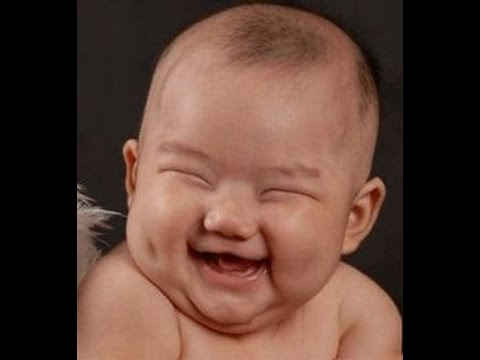